In [52]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.interpolate import interp1d

# Problem 1

In [53]:
x = np.linspace(0.10, 0.80, 8)
y = [0.314, 0.508, 0.640, 0.734, 0.806, 0.862, 0.905, 0.943]

0.565 0.7324999999999999


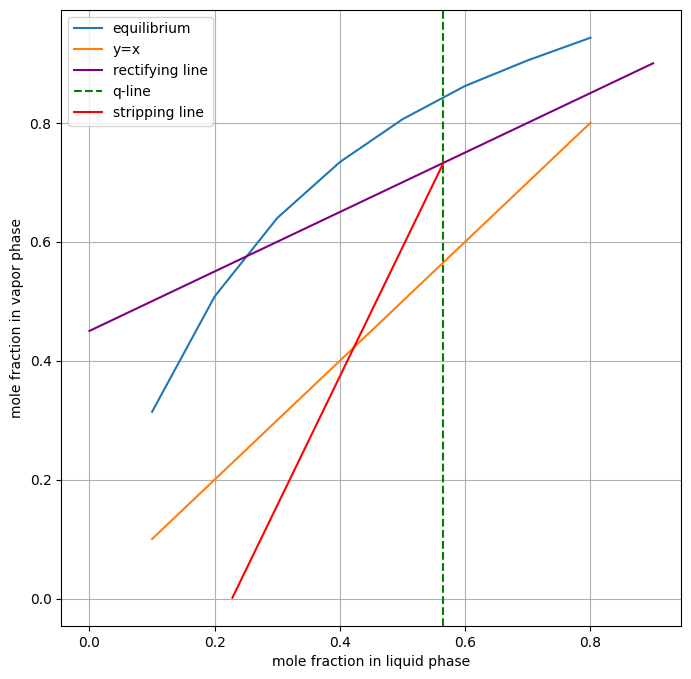

In [54]:
plt.figure(figsize=(8,8))
plt.plot(x, y, label="equilibrium")
plt.plot(x, x, label="y=x")
plt.xlabel("mole fraction in liquid phase")
plt.ylabel("mole fraction in vapor phase")

# rectifying line
x_end, y_end = 0.90, 0.90
slope_1 = 0.5
x_line1 = np.linspace(0, x_end, 100)
y_line1 = y_end - slope_1 * (x_end - x_line1)
plt.plot(x_line1, y_line1, color='purple', label='rectifying line', linestyle='-')

# q line
plt.axvline(x=0.565, color='green', linestyle='--', label='q-line')

y_intersection = y_end - slope_1 * (x_end - 0.565)
print("0.565", y_intersection)

# stripping line
x_end, y_end = 0.565, 0.732
slope_1 = 2.17
x_line1 = np.linspace(0, x_end, 100)
y_line1 = y_end - slope_1 * (x_end - x_line1)

x_line1 = x_line1[y_line1 >= 0]
y_line1 = y_line1[y_line1 >= 0]
plt.plot(x_line1, y_line1, color='red', label='stripping line', linestyle='-')


plt.grid(True)
plt.legend()
plt.show()

# Problem 2B

In [55]:
A_benzene = 13.8858
B_benzene = 2788.51
C_benzene = 220.79

A_ethylbenzene = 14.0045
B_ethylbenzene = 3279.47
C_ethylbenzene = 213.20

P = 101.33 # kPa

In [56]:
T_points = np.linspace(80, 140, 100)

def calculate_P_sat(T, A, B, C):
    return np.exp(A - (B / (T + C)))

P_sat_B = calculate_P_sat(T_points, A_benzene, B_benzene, C_benzene)
P_sat_E = calculate_P_sat(T_points, A_ethylbenzene, B_ethylbenzene, C_ethylbenzene)

x_benzene = (P - P_sat_E) / (P_sat_B - P_sat_E)
y_benzene = (x_benzene * P_sat_B) / P

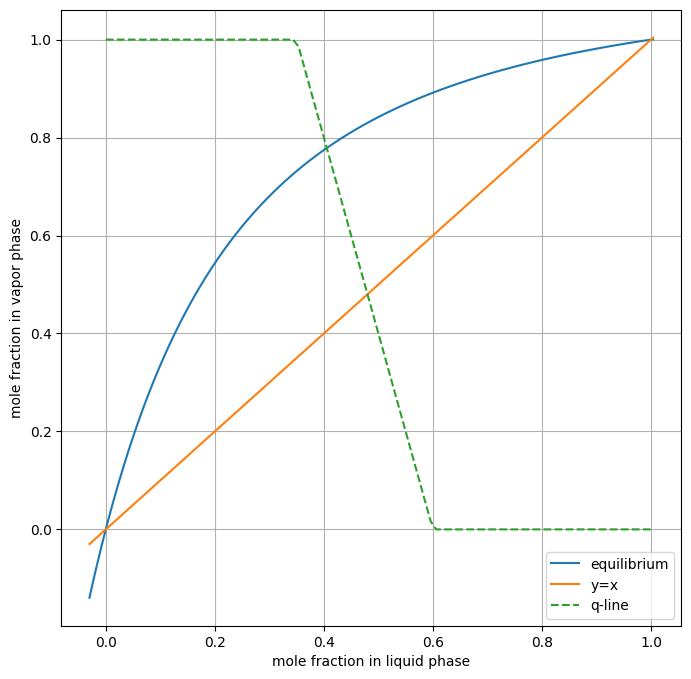

In [57]:
plt.figure(figsize=(8,8))
plt.plot(x_benzene, y_benzene, label="equilibrium")
plt.plot(x_benzene, x_benzene, label="y=x")
plt.xlabel("mole fraction in liquid phase")
plt.ylabel("mole fraction in vapor phase")

# add q-line
x_q_start, y_q_start = 0.48, 0.48
slope = -4
x_range = np.linspace(0, 1, 100)
y_q_line = y_q_start + slope * (x_range - x_q_start)
y_q_line = np.clip(y_q_line, 0, 1)
plt.plot(x_range, y_q_line, linestyle='--', label='q-line')

plt.grid(True)
plt.legend()
plt.show()

In [58]:
# find where q line intersects with equilibrium data so we can find R_min
equilibrium_interp = interp1d(x_benzene, y_benzene, bounds_error=False, fill_value="extrapolate")
q_line_interp = interp1d(x_range, y_q_line, bounds_error=False, fill_value="extrapolate")

intersection_x = np.linspace(0, 1, 1000)
intersection_y_eq = equilibrium_interp(intersection_x)
intersection_y_q = q_line_interp(intersection_x)

difference = intersection_y_eq - intersection_y_q
sign_change_indices = np.where(np.diff(np.sign(difference)))[0]

intersections = []
for idx in sign_change_indices:
    x_intersect = intersection_x[idx]
    y_intersect = intersection_y_eq[idx]
    intersections.append((x_intersect, y_intersect))

print(intersections)


[(0.4044044044044044, 0.7779434531522021)]


# Problem 2C

In [59]:
# get y_benzene(x_B) to start rectifying line
y_benzene_interp = interp1d(x_benzene, y_benzene, bounds_error=False, fill_value="extrapolate")
x_B = 0.012
x_D = 0.95

print("y_B", y_benzene_interp(x_B))
print("y_D", y_benzene_interp(x_D))

y_B 0.049799574454754574
y_D 0.9912229234822139


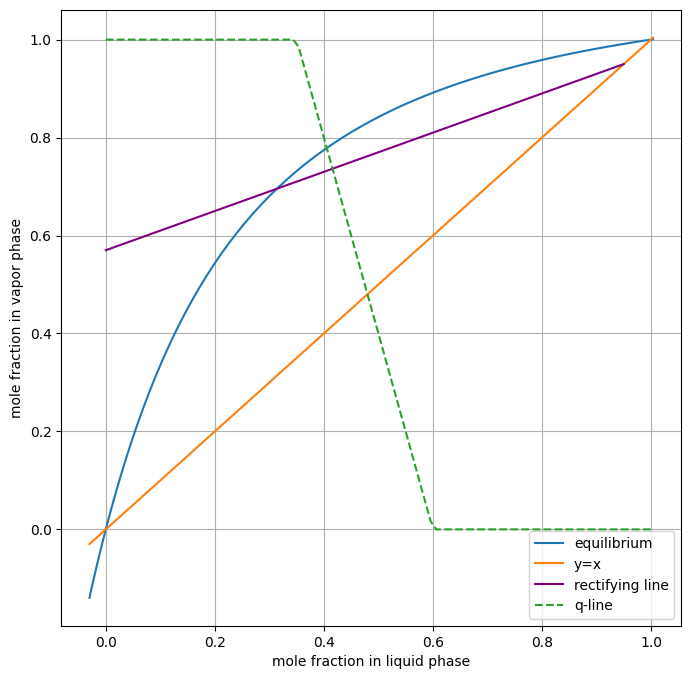

In [60]:
plt.figure(figsize=(8,8))
plt.plot(x_benzene, y_benzene, label="equilibrium")
plt.plot(x_benzene, x_benzene, label="y=x")
plt.xlabel("mole fraction in liquid phase")
plt.ylabel("mole fraction in vapor phase")

# operating lines
x_end, y_end = 0.95, 0.95
slope_1 = 0.40
x_line1 = np.linspace(0, x_end, 100)
y_line1 = y_end - slope_1 * (x_end - x_line1)
plt.plot(x_line1, y_line1, color='purple', label='rectifying line', linestyle='-')

# add q-line
x_q_start, y_q_start = 0.48, 0.48
slope = -4
x_range = np.linspace(0, 1, 100)
y_q_line = y_q_start + slope * (x_range - x_q_start)
y_q_line = np.clip(y_q_line, 0, 1)
plt.plot(x_range, y_q_line, linestyle='--', label='q-line')

plt.grid(True)
plt.legend()
plt.show()


# Problem 3A

In [61]:
y = [.2195, 0.4620, 0.5242, 0.5686, 0.5962, 0.6821, 0.6854, 0.7421, 0.9160]
x = [0.0118, 0.0841, 0.1978, 0.3496, 0.4525, 0.6794, 0.6854, 0.7693, 0.9442]

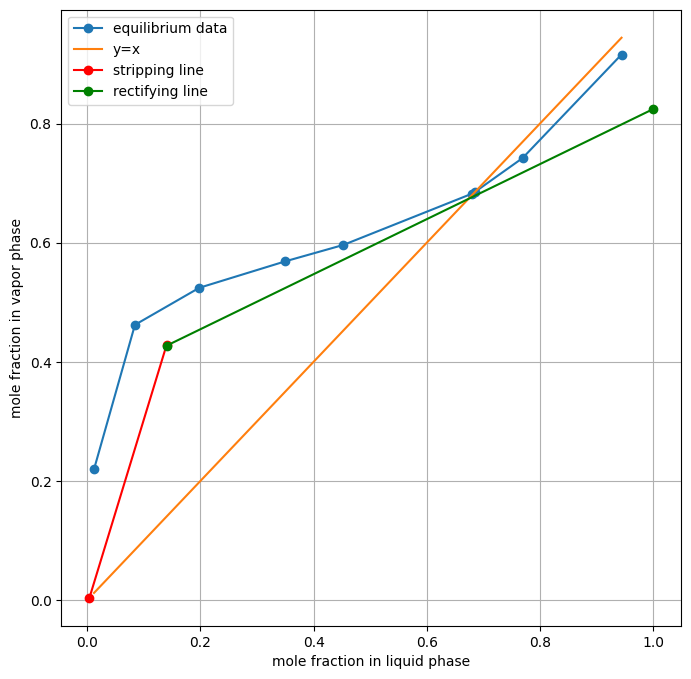

In [62]:
plt.figure(figsize=(8,8))
plt.plot(x,y, label = "equilibrium data", marker ="o")
plt.plot(x,x, label = "y=x")
plt.plot([0.14, 0.00373], [0.428, 0.00373], color='red', marker='o', label='stripping line')
x_values = np.linspace(0.14, 1, 2)
y_values = 0.427 + 0.462 * (x_values - 0.14)
plt.plot(x_values, y_values, color='green', linestyle='-', label='rectifying line', marker='o')

plt.xlabel("mole fraction in liquid phase")
plt.ylabel("mole fraction in vapor phase")
plt.grid(True)
plt.legend()

# Problem 3C

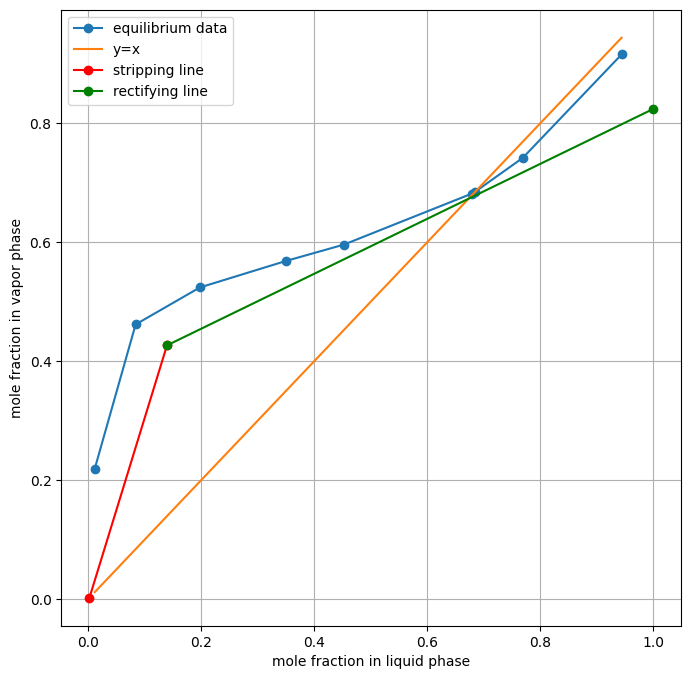

In [63]:
plt.figure(figsize=(8,8))
plt.plot(x,y, label = "equilibrium data", marker ="o")
plt.plot(x,x, label = "y=x")
plt.plot([0.14, 0.0024], [0.428, 0.0024], color='red', marker='o', label='stripping line')
x_values = np.linspace(0.14, 1, 2)
y_values = 0.427 + 0.462 * (x_values - 0.14)
plt.plot(x_values, y_values, color='green', linestyle='-', label='rectifying line', marker='o')

plt.xlabel("mole fraction in liquid phase")
plt.ylabel("mole fraction in vapor phase")
plt.grid(True)
plt.legend()